In [89]:



import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta





In [90]:


# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1



In [91]:



def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        



In [92]:




## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))





In [93]:


df = getQuotes(frameM30, 2023)
df



,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
7424,1691164800,1.09884,1.10232,1.09860,1.10206,10480,8,0
7425,1691166600,1.10208,1.10295,1.10109,1.10119,8040,8,0
7426,1691168400,1.10119,1.10249,1.10021,1.10166,7078,8,0
7427,1691170200,1.10166,1.10280,1.10156,1.10230,5649,8,0


In [94]:


smaShortPeriod = 200
smaLongPeriod = 500

df[f'SMA-{smaShortPeriod}'] = ta.sma(df['close'], length=smaPeriod)
df[f'SMA-{smaLongPeriod}'] = ta.sma(df['close'], length=smaLongPeriod)




In [95]:


df




,time,open,high,low,close,tick_volume,spread,real_volume,SMA-200,SMA-500
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0,NaN,NaN
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0,NaN,NaN
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0,NaN,NaN
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0,NaN,NaN
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7424,1691164800,1.09884,1.10232,1.09860,1.10206,10480,8,0,1.095274,1.102392
7425,1691166600,1.10208,1.10295,1.10109,1.10119,8040,8,0,1.095563,1.102368
7426,1691168400,1.10119,1.10249,1.10021,1.10166,7078,8,0,1.095889,1.102343
7427,1691170200,1.10166,1.10280,1.10156,1.10230,5649,8,0,1.096254,1.102320


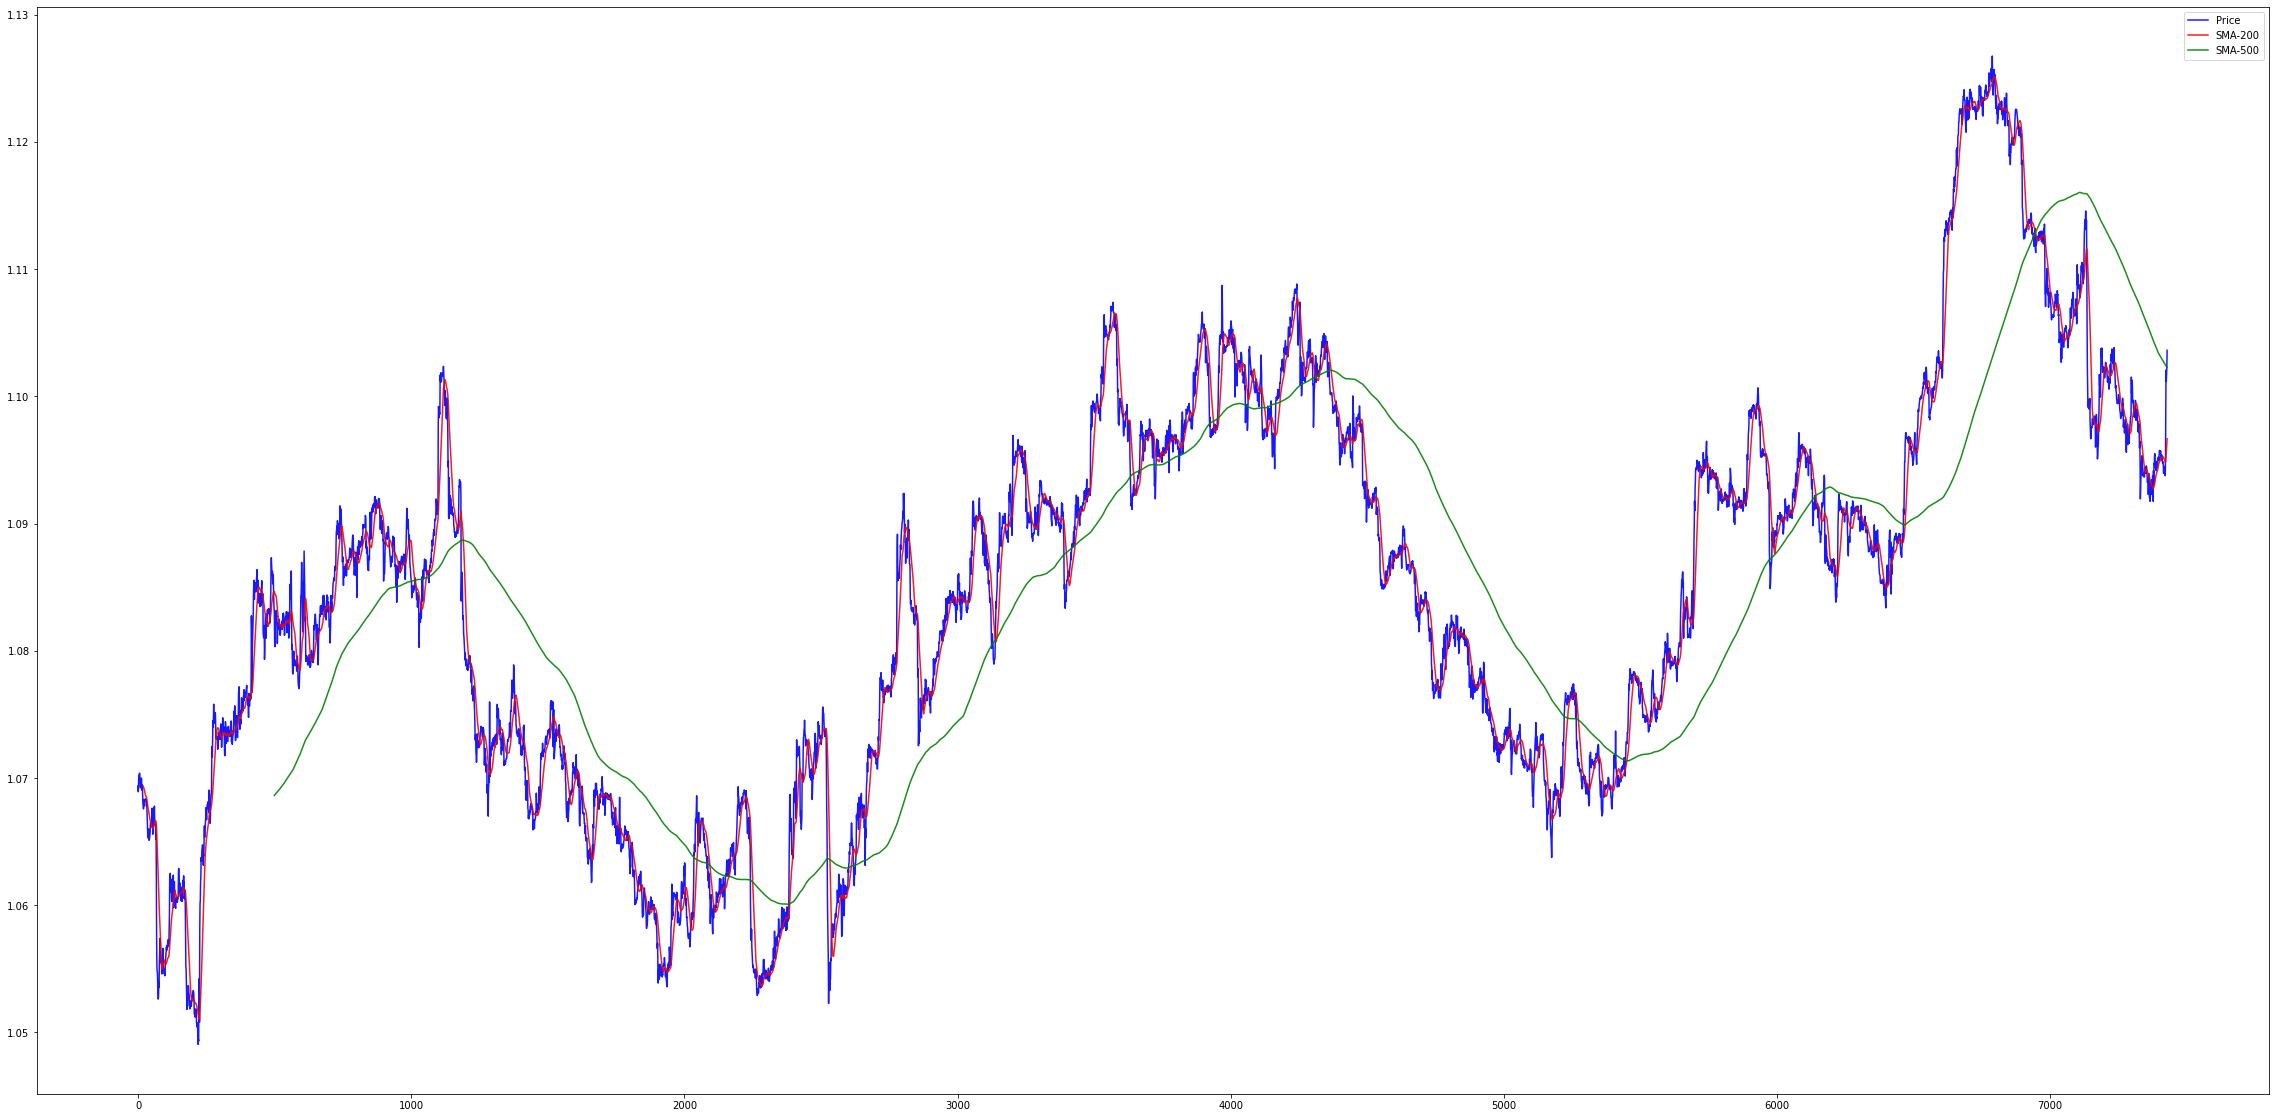

In [96]:


## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)

## Plotting the SMAs
plt.plot(df[f'SMA-{smaShortPeriod}'], label=f'SMA-{smaShortPeriod}', c='red', alpha=0.9)
plt.plot(df[f'SMA-{smaLongPeriod}'], label=f'SMA-{smaLongPeriod}', c='green', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()
     


